In [106]:
# Team Project From MBAN2 Group 3
# Course: Python for Data Analysts: Methods & Tools - DAT-7466 - BMBAN2
# GitHub repositories: https://github.com/HarryYang1008/A2_python

# Group Members:
#   Weikang YANG
#   Ammiel CHIDUWA
#   Alizée Gueneau
#   Maria Medina
#   Yashvi NAGDA

# Part 1: Prepare The Data

In [107]:
# Import the necessary library 
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the database
db_order7 =pd.read_pickle('orders_7.pickle')
db_orders =pd.read_pickle('orders.pickle')
db_items =pd.read_pickle('items.pickle')
db_res =pd.read_pickle('restaurants.pickle')
db_sum =pd.read_pickle('summarized_orders.pickle')


In [108]:
# Check the Data structure for orders_7.pickle
db_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [109]:
# Check the Data structure for items.pickle
db_order7.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


In [110]:
# Check the Data structure for orders.pickle 
db_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [111]:
# Check the Data structure for restaurants.pickle
db_res

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,5/21/2013,2018-05-01
6,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,5/29/2014,2017-08-02
7,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2/2/2015,2017-08-02


In [112]:
# Check the Data structure for summarized_orders.pickle
db_sum.head()

,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0


In [113]:
# The data cleaning process

# IF WE RUN THE BLOCK SINLGE AFTER WHOLE RUNING, THERE POP THE ERROR FOR COLUMN DEFINATION, SO WE READ THE DATA FROM THE FILE AGAIN HERE

db_orders =pd.read_pickle('orders.pickle')

# Create a mapping from RESTAURANT_ID to name
id_to_name = db_res.set_index('RESTAURANT_ID')['NAME'].to_dict()

# Replace RESTAURANT_ID in db_orders with the corresponding name
db_orders['RESTAURANT_NAME'] = db_orders['RESTAURANT_ID'].map(id_to_name)

# Drop the old RESTAURANT_ID column
db_orders = db_orders.drop(columns=['RESTAURANT_ID'])
# View the updated DataFrame
db_orders.head()

# Check for duplicated rows in the ORDER_ID column in db_orders
duplicates_orders = db_orders[db_orders['ORDER_ID'].duplicated()]
print("\nDuplicated ORDER_IDs in db_orders:")
print(duplicates_orders)

db_orders.head()


Duplicated ORDER_IDs in db_orders:
Empty DataFrame
Columns: [ORDER_ID, DATETIME, TYPE, DRINKS, COOKIES, MAIN, BASE, SIDE_1, SIDE_2, RESTAURANT_NAME]
Index: []


,ORDER_ID,DATETIME,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME
0,O1820060,2018-10-11 17:25:50,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown
1,O1011112,2018-05-31 11:35:00,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park
2,O752854,2018-04-21 18:12:57,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia
3,O2076864,2018-11-17 12:50:52,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron
4,O1988898,2018-11-04 18:37:24,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg


In [117]:
db_order7 =pd.read_pickle('orders_7.pickle')

# remove the MAIN BASE SIDE_1 and SIDE_2 in the database with .drop([]'column name'])
# because it's already have the description imformation in later column
db_order7 = db_order7.drop(columns=['MAIN'])
db_order7 = db_order7.drop(columns=['BASE'])
db_order7 = db_order7.drop(columns=['SIDE_1'])
db_order7 = db_order7.drop(columns=['SIDE_2'])

# Check for duplicated rows in the ORDER_ID column in db_order7
duplicates_order7 = db_order7[db_order7['ORDER_ID'].duplicated()]

# Print the results
print("Duplicated ORDER_IDs in db_order7:")
print(duplicates_order7)

# print the result for cleaned data frame
db_order7.head()


Duplicated ORDER_IDs in db_order7:
Empty DataFrame
Columns: [ORDER_ID, DATETIME, RESTAURANT_ID, TYPE, DRINKS, COOKIES, RESTAURANT_NAME, MAIN_NAME, BASE_NAME, SIDE_1_NAME, SIDE_2_NAME]
Index: []


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


# Part 2: Do the Analysis

## 1. The location for each restraunt


In [114]:
import folium

#CREATE A MAP WITH THE INITIAL CENTER SET TO THE AVERAGE OF THE LAT AND LONG
map_center = [db_res['LAT'].mean(), db_res['LONG'].mean()]
map_obj = folium.Map(location=map_center, zoom_start=12)

# MARK THE LOCATION ON THE MAP 
for _, row in db_res.iterrows():
    folium.Marker(
        location=[row['LAT'], row['LONG']], #INPUT THE LAT AND LONG PAIR IN TO THE LOCATION 
        popup=f"{row['NAME']}"  # THE POPUP CAN SHOW THE INFORMATION WHEN WE CLICK ON THE NODES
    ).add_to(map_obj)



map_obj

## 2.The Total order of each Restraunt

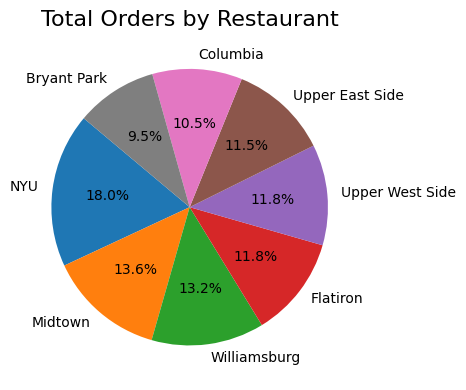

In [115]:
# EXTRACT THE DATA FROM THE ORIGINAL TABLE
order_totals = db_sum.groupby('RESTAURANT_NAME')['NUM_ORDERS'].sum()

# DRAW THE PIE CHART
plt.figure(figsize=(6, 4))  # SET THE SIZE OF THE GRAPH
order_totals_sorted = order_totals.sort_values(ascending=False)  # SORT THE VALUE IN DESCENDING 

# CREAT THE PIE CHART
plt.pie(order_totals_sorted, labels=order_totals_sorted.index, autopct='%1.1f%%', startangle=140)

# ADD LABELS AND TITLE
plt.title("Total Orders by Restaurant", fontsize=16)  # set the title of the chart


# SHOW THE CHART
plt.tight_layout()  # ADJUST THE LAYOUT
plt.show()

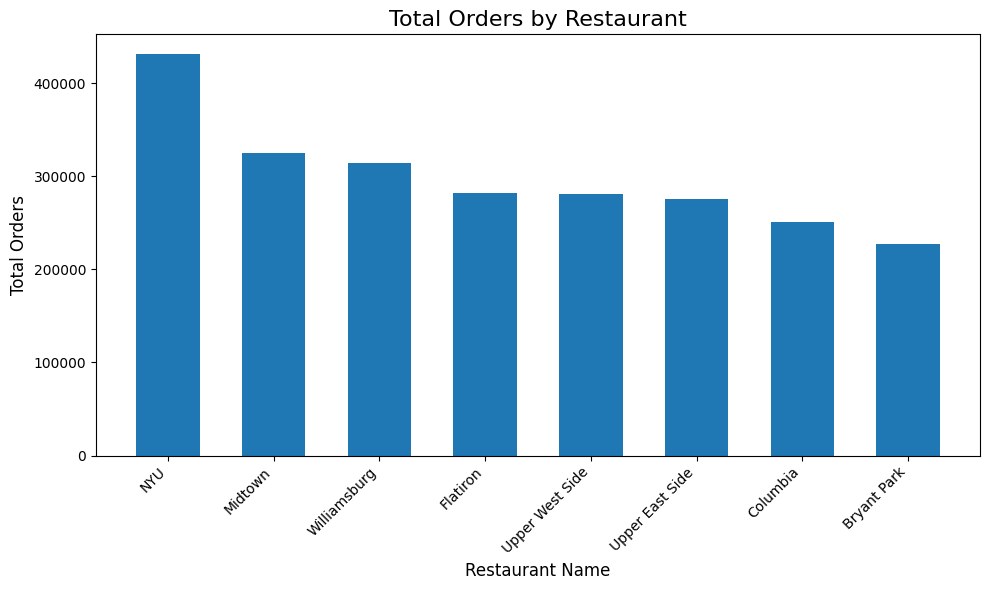

In [116]:
import matplotlib.pyplot as plt

# Extract data from the original table
order_totals = db_sum.groupby('RESTAURANT_NAME')['NUM_ORDERS'].sum()

# Sort data for better visualization
order_totals_sorted = order_totals.sort_values(ascending=False)

# Draw the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.bar(order_totals_sorted.index, order_totals_sorted, width=0.6) #SET THE BAR CHART, SET THE BAR width AS 0.6

# Add labels and title
plt.title("Total Orders by Restaurant", fontsize=16)
plt.xlabel("Restaurant Name", fontsize=12)
plt.ylabel("Total Orders", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust layout and show the chart
plt.tight_layout()
plt.show()


## 3. The monthly order Trend of each Restraunt

C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\weika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


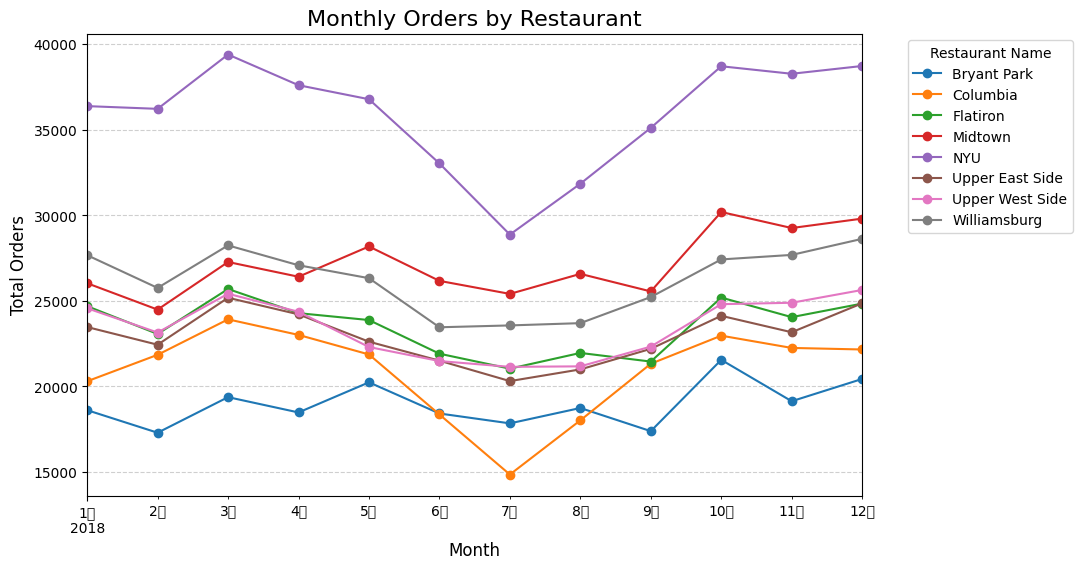

In [118]:
# check the data DATE has the right form or not 
db_sum['DATE'] = pd.to_datetime(db_sum['DATE'])

# change
db_sum['MONTH'] = db_sum['DATE'].dt.to_period('M')

# GROUP DATA BY RESTAURANT AND MONTH, COUNT THE ORDER from db_sum, and store it to the 'monthly_orders' 
monthly_orders = db_sum.groupby(['MONTH', 'RESTAURANT_NAME'])['NUM_ORDERS'].sum().reset_index()

# SET UP THE PIVOT TABLE
# use the data 
pivot_table = monthly_orders.pivot(index='MONTH', columns='RESTAURANT_NAME', values='NUM_ORDERS').fillna(0)

# DEPLOY THE CHART
pivot_table.plot(figsize=(10, 6), marker='o') # set the figure size, marker 'o' means set the data point as the circle

# ADDD THE LABLE AND
plt.title("Monthly Orders by Restaurant", fontsize=16) # set the title of the code
plt.xlabel("Month", fontsize=12) # set the x-axis lable
plt.ylabel("Total Orders", fontsize=12) # set the y-axis lable
plt.grid(True, linestyle='--', alpha=0.6)
 # property to specify the bounding box (box anchor) for the legend relative to the axes or figure 
 # 1.05: Positions the legend slightly outside the axes to the right (105% of the axes width).
 # 1: Aligns the top of the legend box with the top of the axes.
plt.legend(title="Restaurant Name", bbox_to_anchor=(1.05, 1), loc='upper left')

# show the plot
plt.show() 

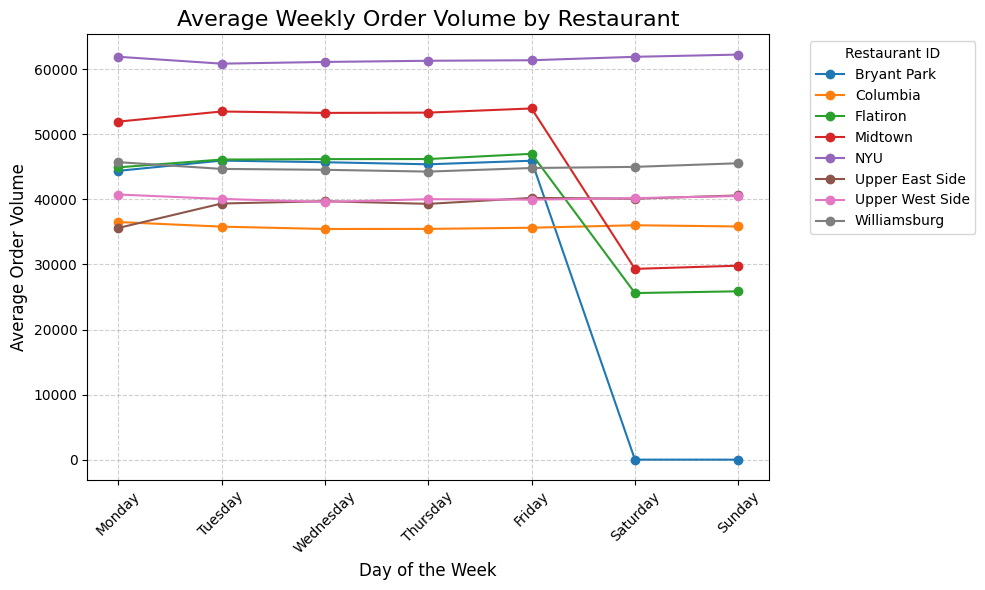

In [119]:
# ------------------- Chat GPT 4.0 work for this block -------------------------

# Ensure 'DATETIME' column is in the right format
db_orders['DATETIME'] = pd.to_datetime(db_orders['DATETIME'])

# Extract day of the week and restaurant data
db_orders['DAY_OF_WEEK'] = db_orders['DATETIME'].dt.day_name()

# Calculate average order volume for each restaurant by day of the week
average_orders = (
    db_orders.groupby(['DAY_OF_WEEK', 'RESTAURANT_NAME'])# Order the dataset by 'DAY_OF_WEEK', 'RESTAURANT_NAME'
    ['ORDER_ID']  
    .count() #count the total number of the 'order_id'
    .groupby(level=[0, 1]) #use multipule level index, 2 layer: restraurant and order count
    .mean() #take the average oreder number as the presented data
    .reset_index(name='AVERAGE_ORDER_VOLUME') #rest the index, and AVERAGE_ORDER_VOLUME becomes the name of the column containing the aggregated values.
)

# Pivot to reshape the data for plotting
pivot_table_avg = average_orders.pivot_table(
    index='DAY_OF_WEEK', 
    columns='RESTAURANT_NAME', 
    values='AVERAGE_ORDER_VOLUME', 
    fill_value=0
)

# Sort the days of the week for proper order in the plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # set up a list for x-axis lable
# Matches the index to the specified order in day_order.
# Inserts NaN for rows not present in the original DataFrame.
pivot_table_avg = pivot_table_avg.reindex(day_order) 

# Plotting the data
 
pivot_table_avg.plot(marker='o', figsize=(10, 6)) # set the plot size

# Add titles and labels
plt.title("Average Weekly Order Volume by Restaurant", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Average Order Volume", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6) # put the grid in the graph to see the trend better, set the form as '--' and  set the appha as 0.6
plt.legend(title="Restaurant ID", bbox_to_anchor=(1.05, 1), loc='upper left')
# property to specify the bounding box (box anchor) for the legend relative to the axes or figure 
 # 1.05: Positions the legend slightly outside the axes to the right (105% of the axes width).
 # 1: Aligns the top of the legend box with the top of the axes.
plt.tight_layout() # tight the layout make sure the each element will not overlap

# Display the plot
plt.show()


## 4. The daily trend in different Restaurants

<Figure size 1200x800 with 0 Axes>

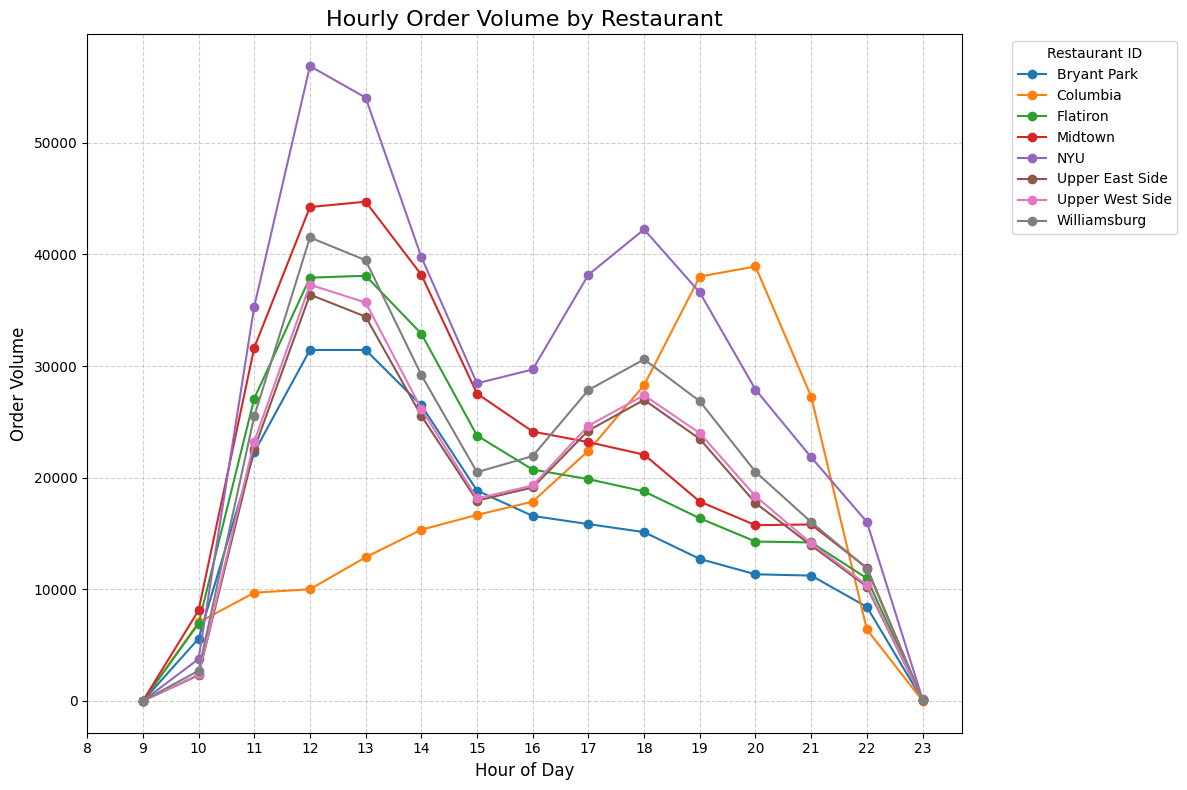

In [120]:
# make sure the DATETIME column in orders.pickle is in the right format
db_orders['DATETIME'] = pd.to_datetime(db_orders['DATETIME'])

# Extract the hour from each record of DATETIME
db_orders['HOUR'] = db_orders['DATETIME'].dt.hour

# GROUP THE DATA BY RESTRANUT AND HOUR, CHECK THE RESULT
#rest the index, and ORDER_ID becomes the name of the column containing the aggregated values.
hourly_orders = db_orders.groupby(['HOUR', 'RESTAURANT_NAME'])['ORDER_ID'].count().reset_index()

# MKE THE PIVOT TABLE AND USE HOUR AS THE INDEX AND USE RESTAURANT_ID AS COLUMN AND THE VALUE AS COUNT OF ORDERS
# ALSO REPLACE THE NaN VALUE AS 0
pivot_table = hourly_orders.pivot(index='HOUR', columns='RESTAURANT_NAME', values='ORDER_ID').fillna(0)

# SET THE SIZE OF CHART AND DEPLOY
plt.figure(figsize=(12, 8))
pivot_table.plot(figsize=(12, 8), marker='o')

# ADD THE LABLE AND TITLE TO THE CHART
plt.title("Hourly Order Volume by Restaurant", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12) # SET THE X-AXIS LABLE
plt.ylabel("Order Volume", fontsize=12)# SET THE Y-AXIS LABLE
plt.xticks(range(8, 24))  # BASE ON THE DATASET WE USE 9:00--23:00 AS THE RANGE OF TIME
plt.grid(True, linestyle='--', alpha=0.6) 
plt.legend(title="Restaurant ID", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# SHOW THE CHART
plt.show()


## 5. The Order Type Percentage in each Restraunt Trend 

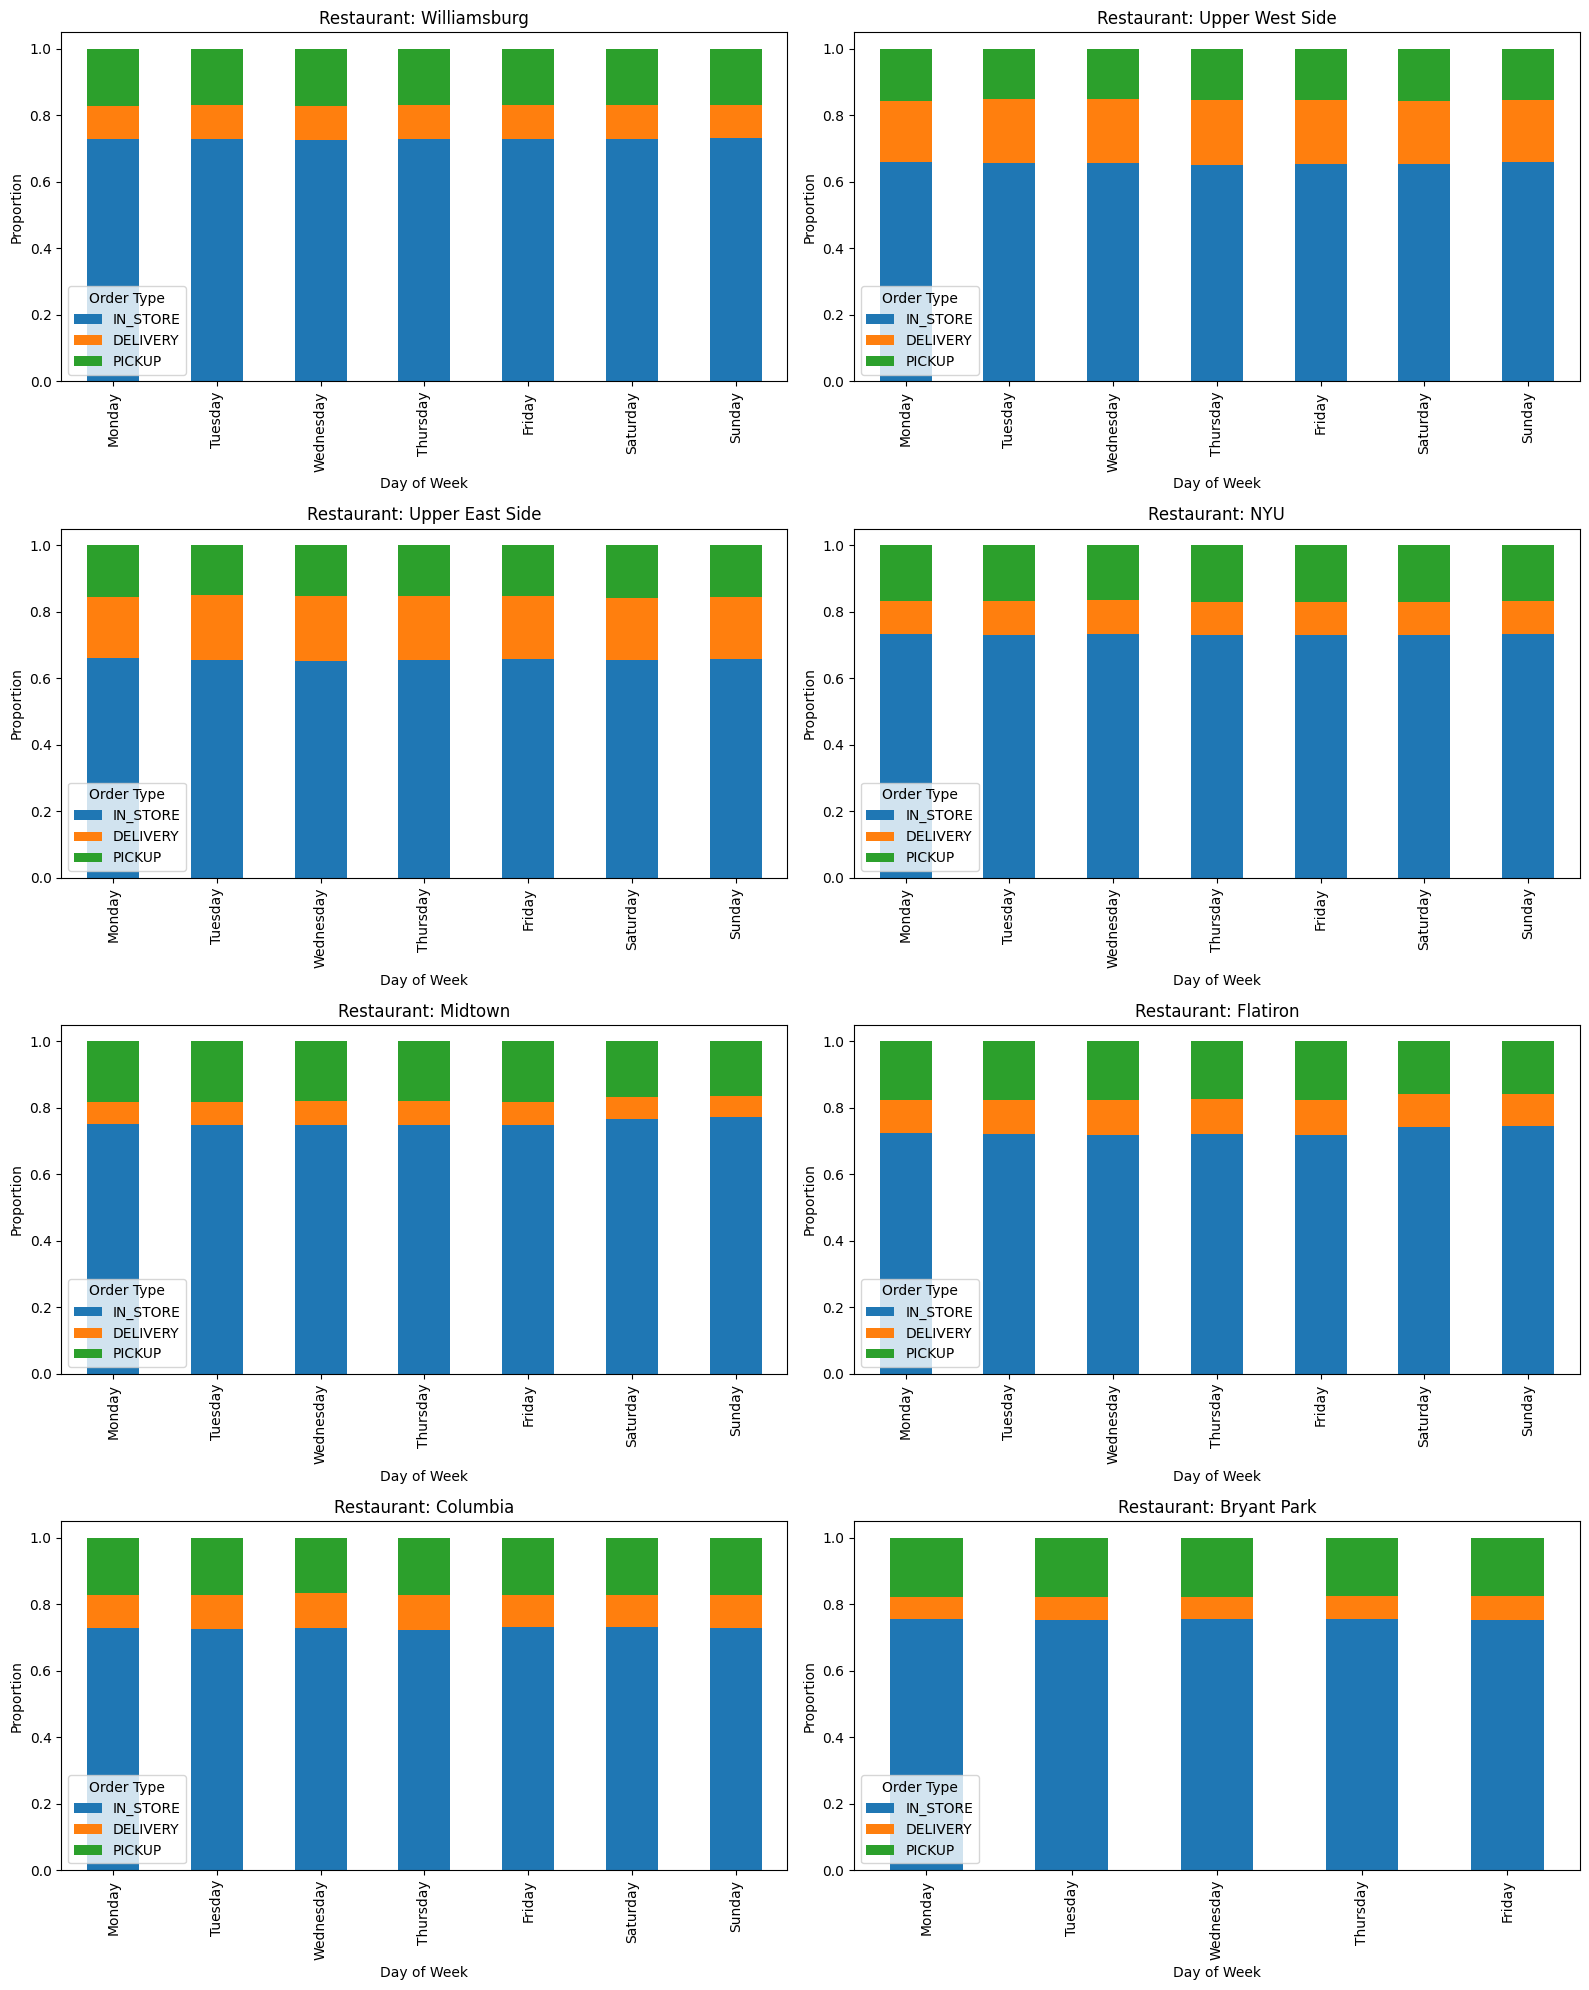

In [121]:
# Ensure 'DATETIME' is in the correct format
db_orders['DATETIME'] = pd.to_datetime(db_orders['DATETIME'])

# Extract day of the week
# dt.dayname is the function from pandas library which used to extract the name of the day of the week
db_orders['DAY_OF_WEEK'] = db_orders['DATETIME'].dt.day_name()

# Group by DAY_OF_WEEK, RESTAURANT_NAME, and TYPE, and calculate the average order count
grouped_data = ( # set up a new  pandas DataFrame
    db_orders.groupby(['DAY_OF_WEEK', 'RESTAURANT_NAME', 'TYPE'])['TYPE']
    .count() # count the number record grouped by type
    .reset_index(name='COUNT') # rest the index, and AVERAGE_ORDER_VOLUME becomes the name of the column containing the aggregated values.
)

# Create a pivot table for proportions
pivot_table = grouped_data.pivot_table(
    # set up a pivot table and replace the NaN value as 0
    index=['DAY_OF_WEEK', 'RESTAURANT_NAME'], columns='TYPE', values='COUNT', fill_value=0
)

# Calculate proportions
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

# Reset index for plotting
pivot_table = pivot_table.reset_index()

# Sort by day of the week for correct order in plots
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # setup the list for x-axis lables
pivot_table['DAY_OF_WEEK'] = pd.Categorical(pivot_table['DAY_OF_WEEK'], categories=day_order, ordered=True) 
pivot_table = pivot_table.sort_values('DAY_OF_WEEK')

# Get unique restaurant names for the loop
restaurants = pivot_table['RESTAURANT_NAME'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20)) # combine the plots in 1 output, 2 columns, 4 rows, total size of output is 16x20
axes = axes.flatten() # transforms a multi-dimensional array of axes (created by plt.subplots()) into a one-dimensional array, making it easier to iterate through them in a loop.


# USE THE FOR LOOP ITERATE ON THE RESTAURANT ID LIST DRAW THE CHART FOR EACH RESTAURANT
for i, restaurant in enumerate(restaurants):
    if i >= len(axes):  # iterate the restraunt 
        break           # if inedx is larger than the length of the axess, then go to the next step
    restaurant_data = pivot_table[pivot_table['RESTAURANT_NAME'] == restaurant]
    # set the index, and AVERAGE_ORDER_VOLUME becomes the name of the column containing the aggregated values.
    restaurant_data.set_index('DAY_OF_WEEK')[['IN_STORE', 'DELIVERY', 'PICKUP']].plot(
        kind='bar', # set the type of plot to bar
        stacked=True, # use stacked bar chart
        ax=axes[i],   # from the axes, set ax as the current value that iterating in the loop
        title=f"Restaurant: {restaurant}" # set the title as the current plot title, start with string Restaurant, follow by value.
    )
    plt.tight_layout()
    axes[i].set_xlabel("Day of Week")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Order Type")


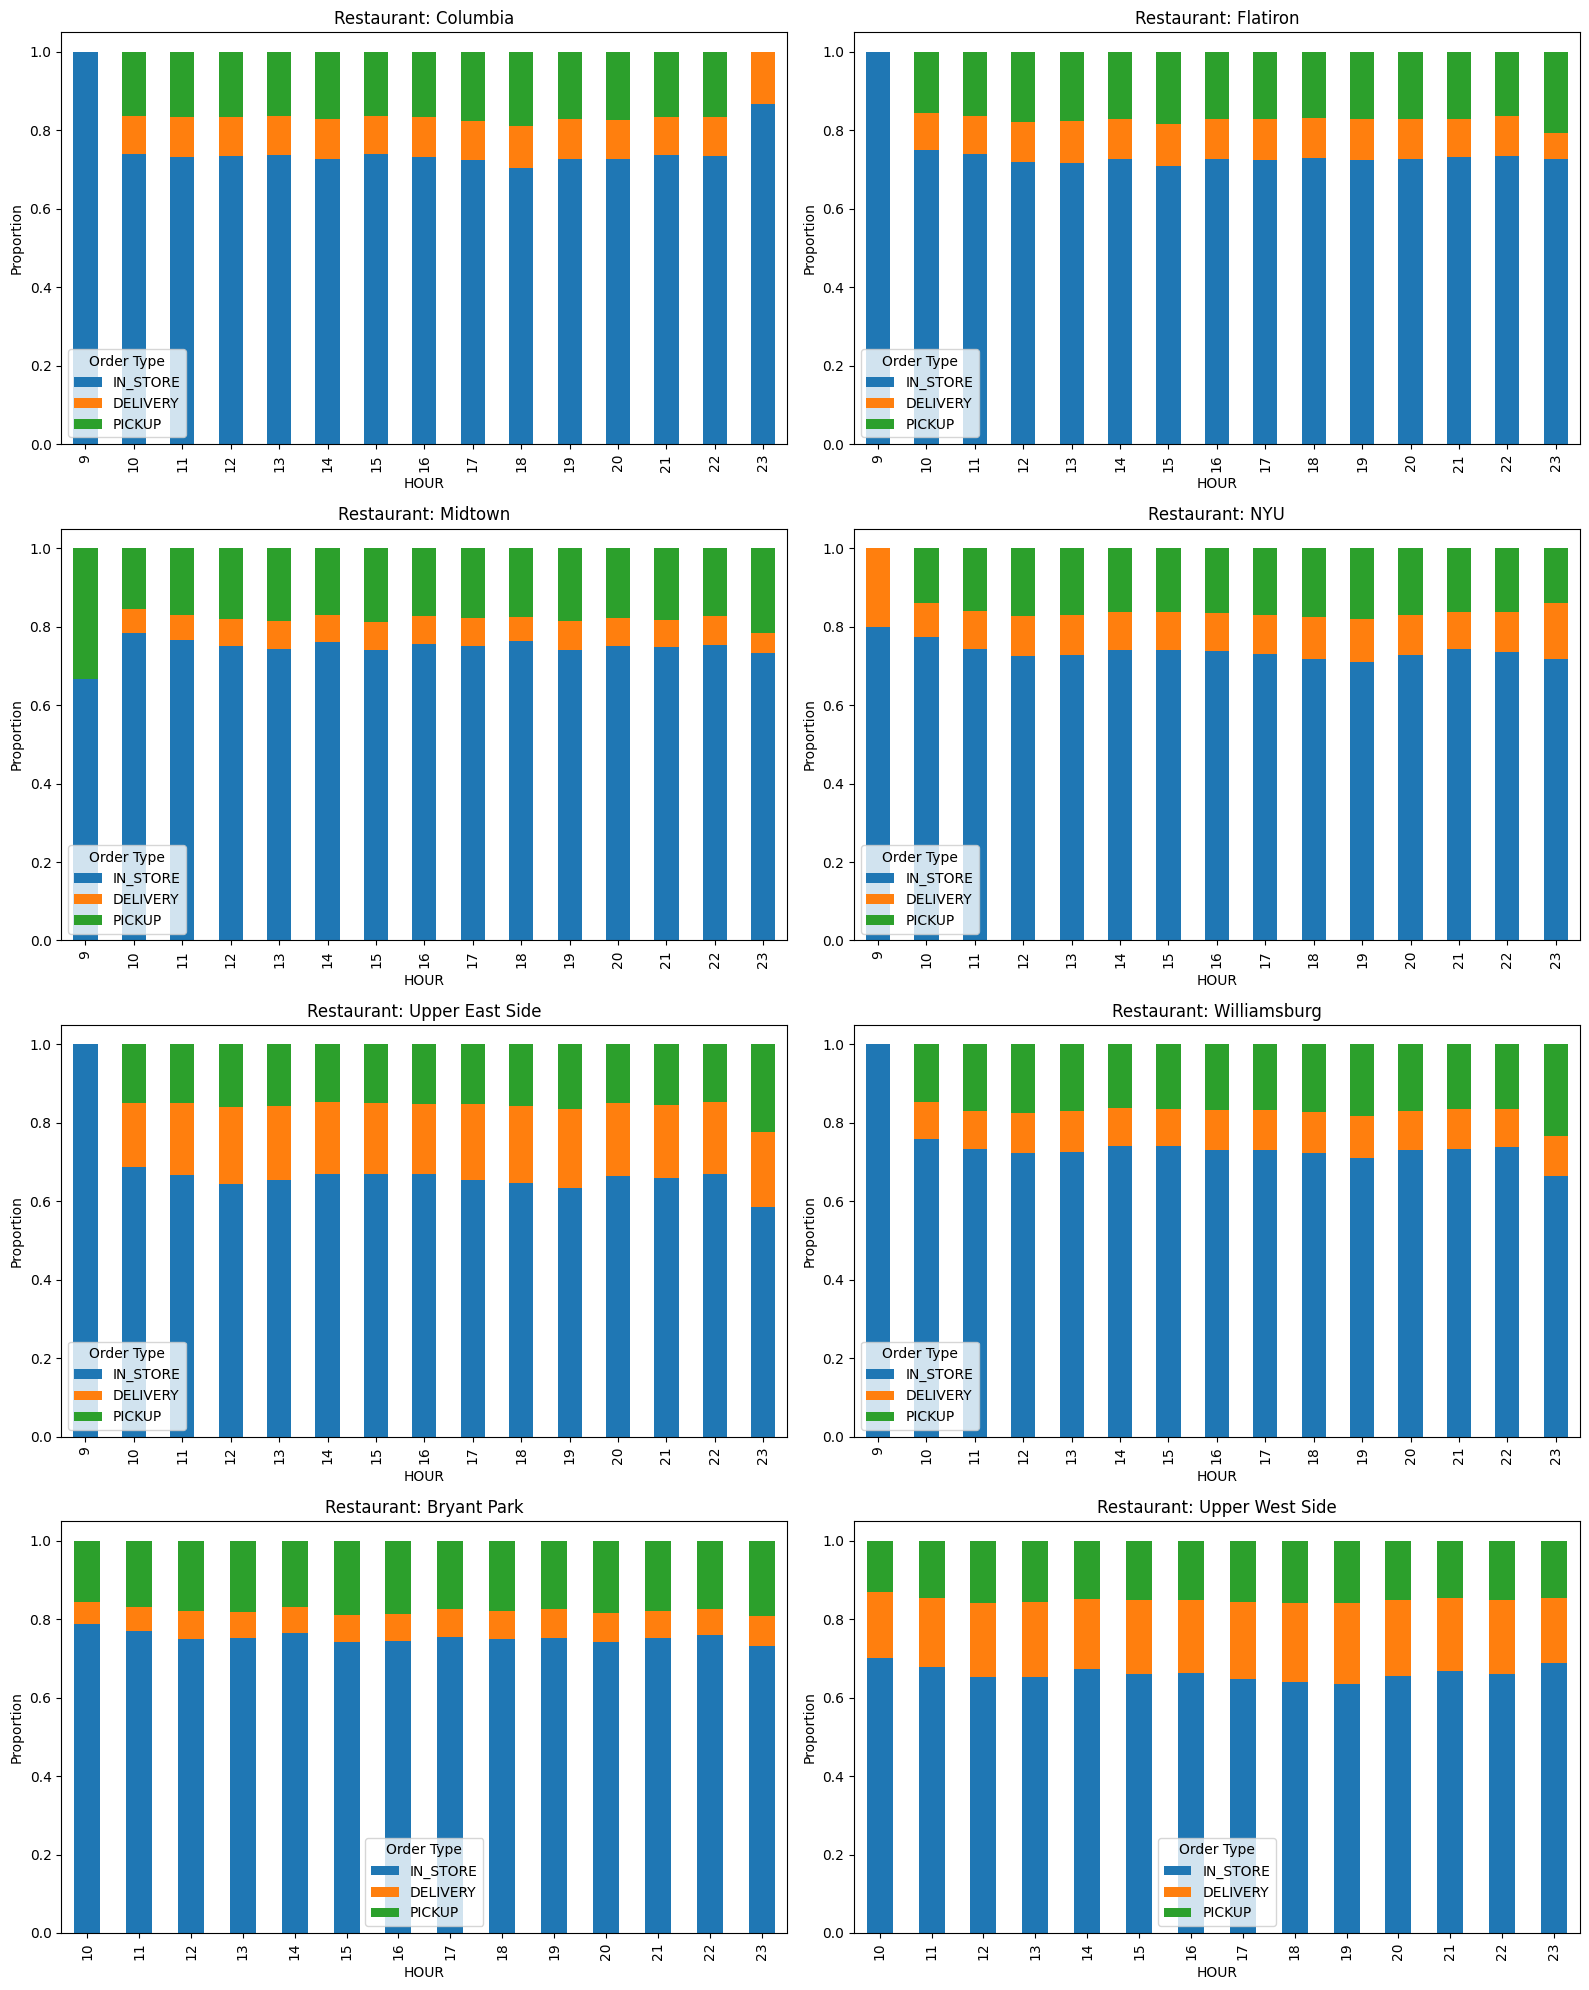

In [122]:
# SAME AS THE ABOVE CODE BLOCK MAKE SURE THE DATETIME IS IN THE RIGHT FORMAT
db_orders['DATE'] = pd.to_datetime(db_orders['DATETIME'])

# EXTRACT THE MOMNTH 
db_orders['HOUR'] = db_orders['DATETIME'].dt.hour

# GROUP THE DATA BY RESTAURANT MONTH AND ORDER TYPE AND ALSO COUNT THE OREDER
grouped_data = db_orders.groupby(['HOUR', 'RESTAURANT_NAME', 'TYPE'])['TYPE'].count().reset_index(name='COUNT')

# PREPARE THE CHART AND USE THE TYPE AS THE Y-AXIS AND SHOW THE TYPE VOLUME IN THE CLOUMN PERCENTAGE
pivot_table = grouped_data.pivot_table(
    index=['HOUR', 'RESTAURANT_NAME'], columns='TYPE', values='COUNT', fill_value=0
)

# CACULATE THE PRECENTGE OF EACH ORDER TYPE
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

pivot_table = pivot_table.reset_index()
# PUT THE RESTAURANT ID IN TO A LIST AND PREPARE TO DO THE FOR LOOP LATER
restaurants = pivot_table['RESTAURANT_NAME'].unique()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten() 

# USE THE FOR LOOP ON THE RESTAURANT ID LIST DRAW THE CHART FOR EACH RESTAURANT
# Same logic as previous code block
for i, restaurant in enumerate(restaurants):
    if i >= len(axes):  
        break
    restaurant_data = pivot_table[pivot_table['RESTAURANT_NAME'] == restaurant]
    restaurant_data.set_index('HOUR')[['IN_STORE', 'DELIVERY', 'PICKUP']].plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        title=f"Restaurant: {restaurant}"
    )
    plt.tight_layout()
    axes[i].set_xlabel("HOUR")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Order Type")


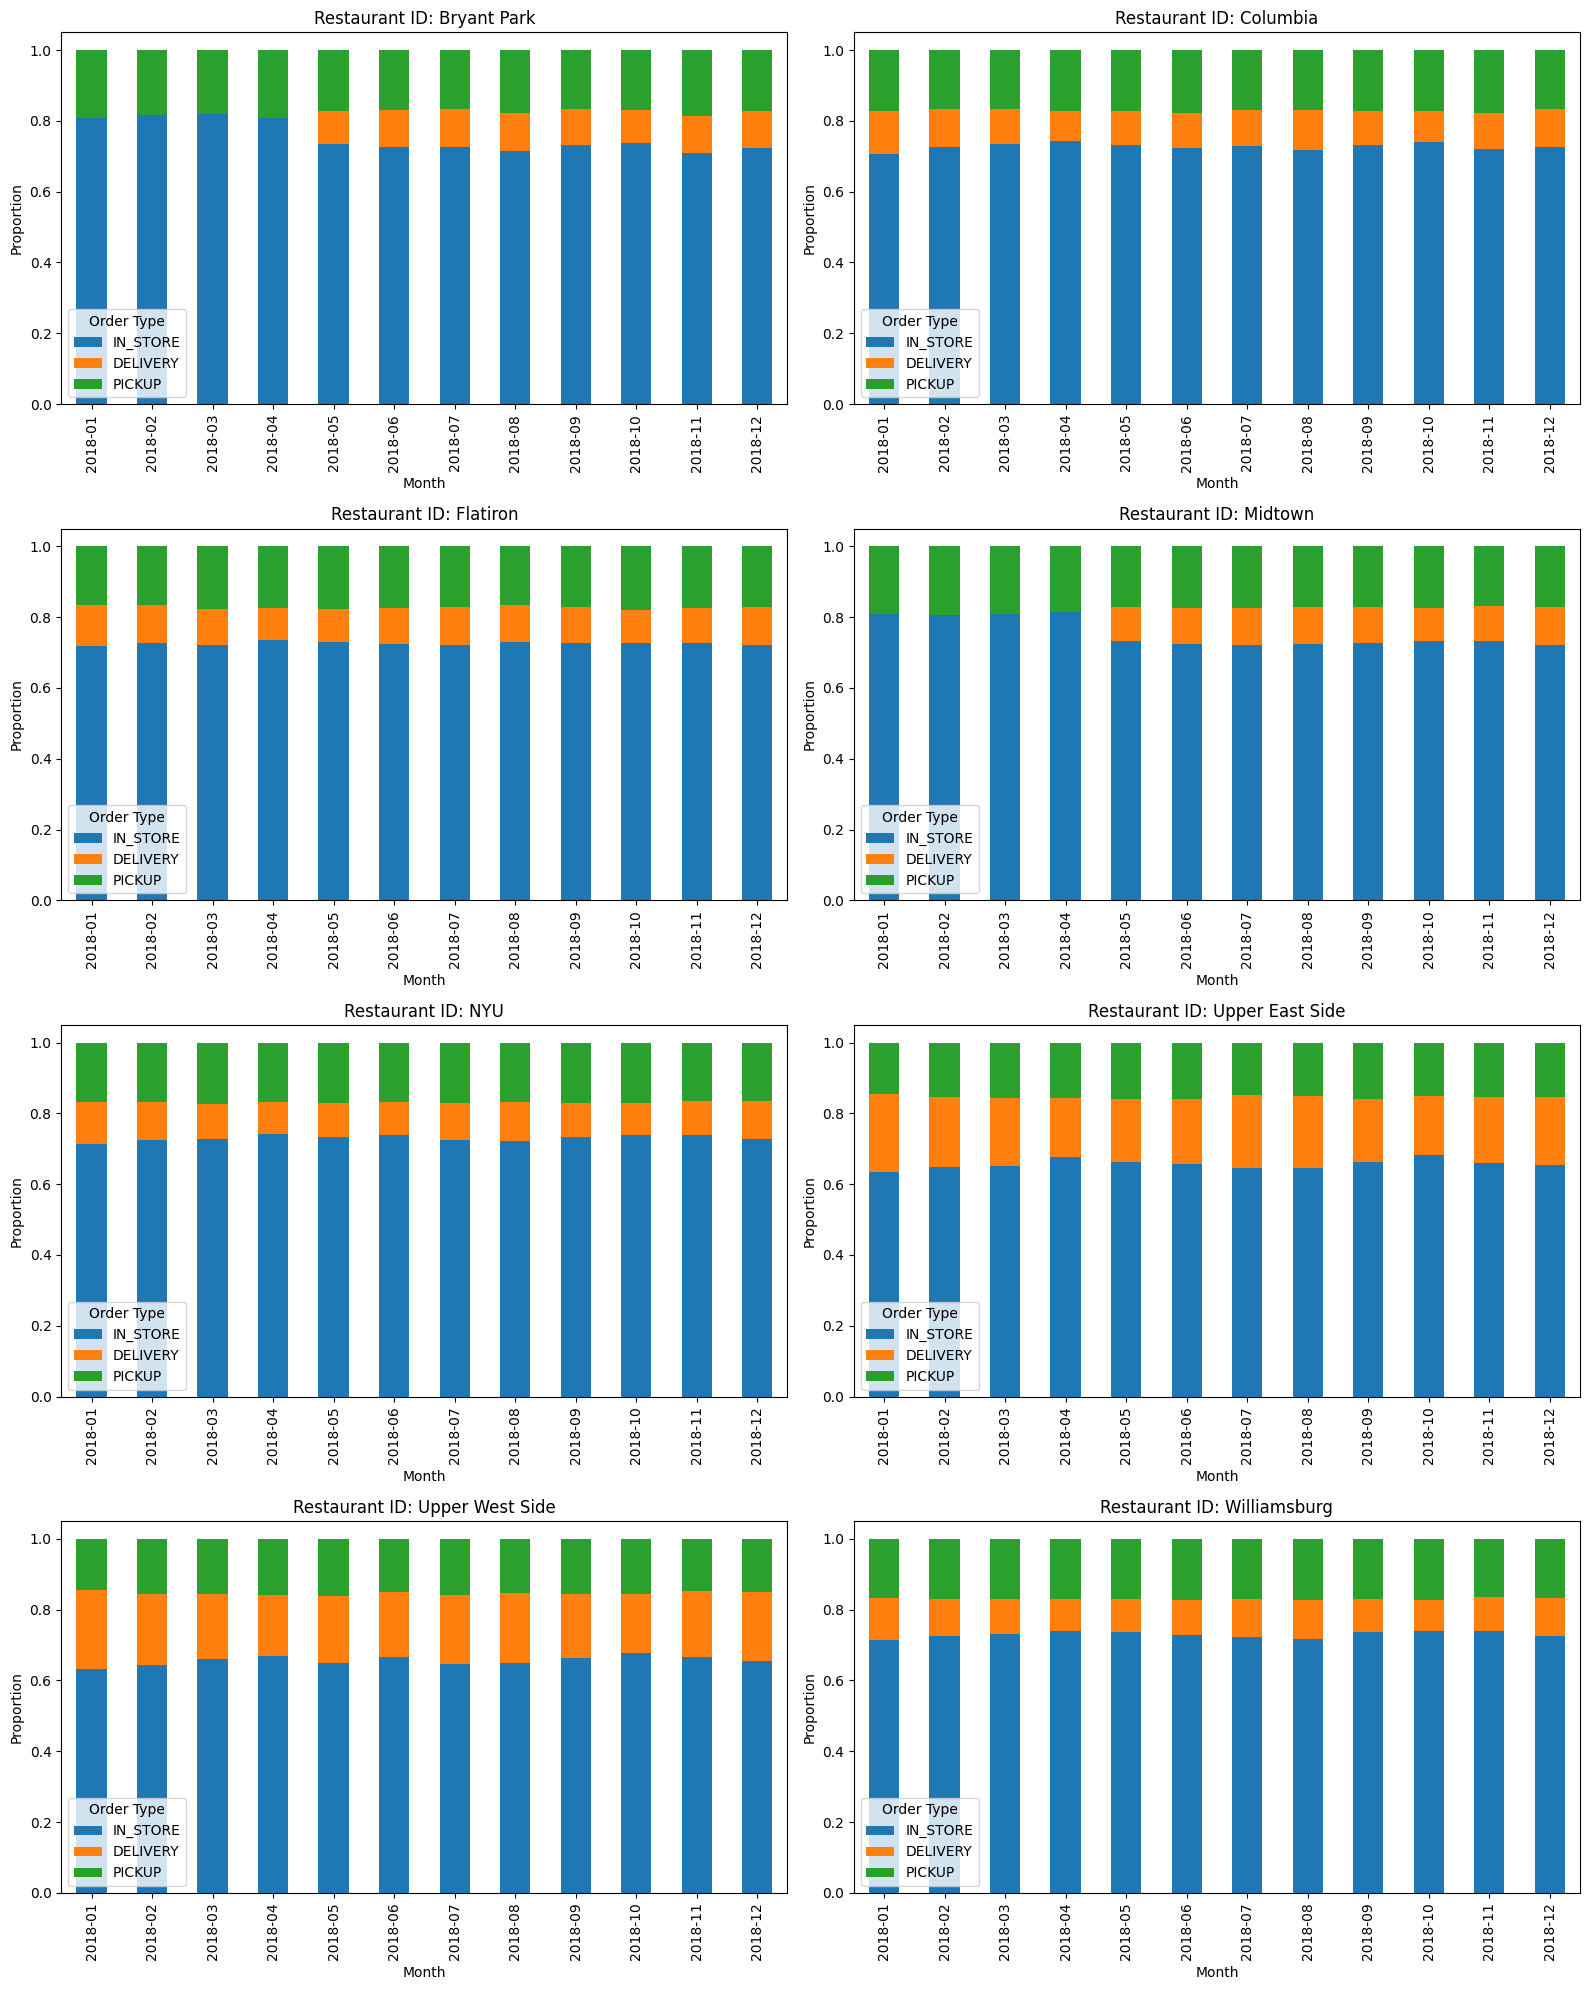

In [123]:
# SAME AS THE ABOVE CODE BLOCK MAKE SURE THE DATETIME IS IN THE RIGHT FORMAT
db_orders['DATE'] = pd.to_datetime(db_orders['DATETIME'])

# EXTRACT THE MOMNTH 
db_orders['MONTH'] = db_orders['DATETIME'].dt.to_period('M')

# GROUP THE DATA BY RESTAURANT MONTH AND ORDER TYPE AND ALSO COUNT THE OREDER
grouped_data = db_orders.groupby(['MONTH', 'RESTAURANT_NAME', 'TYPE'])['TYPE'].count().reset_index(name='COUNT')

# PREPARE THE CHART AND USE THE TYPE AS THE Y-AXIS AND SHOW THE TYPE VOLUME IN THE CLOUMN PERCENTAGE
pivot_table = grouped_data.pivot_table(
    index=['MONTH', 'RESTAURANT_NAME'], columns='TYPE', values='COUNT', fill_value=0
)

# CACULATE THE PRECENTGE OF EACH ORDER TYPE
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0)

pivot_table = pivot_table.reset_index()
# PUT THE RESTAURANT ID IN TO A LIST AND PREPARE TO DO THE FOR LOOP LATER
restaurants = pivot_table['RESTAURANT_NAME'].unique()

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten() 

# USE THE FOR LOOP ON THE RESTAURANT ID LIST DRAW THE CHART FOR EACH RESTAURANT
# same logic as previous code block
for i, restaurant in enumerate(restaurants):
    if i >= len(axes):  
        break
    restaurant_data = pivot_table[pivot_table['RESTAURANT_NAME'] == restaurant] # 
    restaurant_data.set_index('MONTH')[['IN_STORE', 'DELIVERY', 'PICKUP']].plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        title=f"Restaurant ID: {restaurant}"
    )
    plt.tight_layout()
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("Proportion")
    axes[i].legend(title="Order Type")


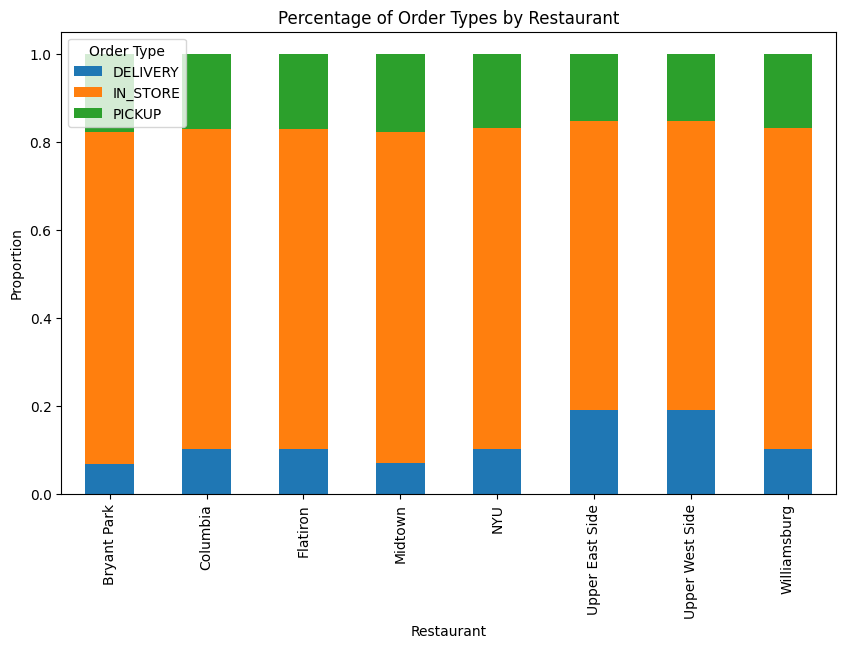

In [124]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'DATETIME' column is in the right format, if not use to_datetime format it.
db_orders['DATETIME'] = pd.to_datetime(db_orders['DATETIME'])

# Group data by restaurant and order type, and count orders and create a new panda data frame
grouped_data = db_orders.groupby(['RESTAURANT_NAME', 'TYPE'])['TYPE'].count().reset_index(name='COUNT')

# Pivot to reshape data for visualization
pivot_table = grouped_data.pivot_table(
    index='RESTAURANT_NAME', columns='TYPE', values='COUNT', fill_value=0 # set the NaN value to 0 and set up the data 
)

# Calculate proportions
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) 

# Plotting
pivot_table.plot(
    kind='bar', # set the plot type to bar
    stacked=True, # use the stacked bar chart
    figsize=(10, 6), # set the size of plot to 10x6
    title="Percentage of Order Types by Restaurant" # set the plot title
)

# Customize the plot 
plt.xlabel("Restaurant") # set up the lable for the x-axis
plt.ylabel("Proportion") # set up the lable for y-axis
plt.legend(title="Order Type") # add a legend to the plot which contain the information of order type and the which color are they use in the bar


# Show the plot
plt.show()


## 6. The Most Popular Items In Each Restaurant

In [ ]:
# LIST OUT THE COLUMN THAT WE NEED FOR ANALYSIS 
columns_to_analyze = ['RESTAURANT_NAME', 'MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME', 'DRINKS']
db_order7_sub = db_order7[columns_to_analyze]

db_order7_sub['SIDE_NAME'] = db_order7_sub[['SIDE_1_NAME', 'SIDE_2_NAME']].apply(  # combine the side_1 and side_2 in the same column
    # x represents a row or column of a DataFrame, depending on the value of axis:
    # axis=1: Applies the function row-wise.
    # Use Series to converts the non-NaN values of x into a pandas Series. 
    lambda x: pd.Series(x.dropna()).tolist(), axis=1 
)
db_order7_sub = db_order7_sub.explode('SIDE_NAME') 
# define a function which use to return the most popular item in the restraurant
# input use df: data frame/ column: the column that gonna use to do the rank
def get_most_popular(df, column):
    # return the value, value_counts list all the distinc value, idmax return the buttom one which has the highed value, default sort asending
    return df[column].value_counts().idxmax()

results = [] # setup a empty list , prepare for store the returned value
# set up a for loop that iterate each restaurant 
for restaurant, group in db_order7_sub.groupby('RESTAURANT_NAME'):
    result = { # set up a new Python dictionary for each iteration, use colunm name as key, and function returned value as key-value
        'Restaurant': restaurant,
        'Most Popular Main': get_most_popular(group, 'MAIN_NAME'),
        'Most Popular Base': get_most_popular(group, 'BASE_NAME'),
        'Most Popular Side': get_most_popular(group, 'SIDE_NAME'),
        'Most Popular Drink': get_most_popular(group, 'DRINKS')
    }
    results.append(result) # appeed the result to the 'result' list that we set up before

result_df = pd.DataFrame(results) # set up a new data frame for the results
result_df # return the data frame



##  6. The Most Popular Items In Each Month

In [ ]:
# ---------------------- THE MOST POPULAR ITEM BY MONTH --------------------------

# MAKE SURE THE FORMAT OF TIME STAMP IS RIGHT
db_order7['DATETIME'] = pd.to_datetime(db_order7['DATETIME'])

# EXTRACT MONTH AND YEAR
db_order7['MONTH'] = db_order7['DATETIME'].dt.to_period('M')

# ANALYSIS THE MOST POPULAR ITEM BY MONTH
monthly_results = [] # setup a empty list , prepare for store the returned value

for month, group in db_order7.groupby('MONTH'):
    group_sub = group[columns_to_analyze].copy()  
    group_sub['SIDE_NAME'] = group_sub[['SIDE_1_NAME', 'SIDE_2_NAME']].apply( # combine the side_1 and side_2 in the same column
        # x represents a row or column of a DataFrame, depending on the value of axis:
        # axis=1: Applies the function row-wise.
        # Use Series to converts the non-NaN values of x into a pandas Series. 
        lambda x: pd.Series(x.dropna()).tolist(), axis=1
    )
    group_sub = group_sub.explode('SIDE_NAME')
    
    # we did not define the function again, because it alreadt be defined in the previous block
    # CREAT THE DATABASE FOR MOST POPULAR ITEMS
    monthly_result = {
        'Month': str(month), # set up a new Python dictionary for each iteration, use colunm name as key, and function returned value as key-value
        'Most Popular Main': get_most_popular(group_sub, 'MAIN_NAME'),
        'Most Popular Base': get_most_popular(group_sub, 'BASE_NAME'),
        'Most Popular Side': get_most_popular(group_sub, 'SIDE_NAME'),
        'Most Popular Drink': get_most_popular(group_sub, 'DRINKS')
    }
    monthly_results.append(monthly_result) # appeed the result to the 'monthly_result' list that we set up before

# TRANSFORM TO DATAFRAME
monthly_result_df = pd.DataFrame(monthly_results) # set up a new data frame for the monthly_results

# SHOW THE RESULT
monthly_result_df # return the data frame